In [24]:
import pandas as pd
from config import api_key
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import datetime

In [25]:
culture_rain_data = pd.read_csv("Milwaukee_Culture_Rainfall.csv", index_col=0)
culture_rain_data

,Date,Rainfall (In)
163,2008-07-01,0.0
451,2008-07-02,0.0
11,2008-07-03,0.0
669,2008-07-04,0.0
703,2008-07-05,0.0
...,...,...
755,2016-09-25,0.0
312,2016-09-28,0.0
754,2016-09-29,0.0
710,2016-09-30,0.0


In [38]:
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"],format= "%Y-%m-%d")
culture_rain_data["Date"] = pd.to_datetime(culture_rain_data["Date"], yearfirst=True)
culture_rain_data["Year"] = pd.DatetimeIndex(culture_rain_data["Date"]).year
culture_rain_data["Month"] = pd.DatetimeIndex(culture_rain_data["Date"]).month
culture_rain_data

,Date,Rainfall (In),Year,Month
163,2008-07-01,0.0,2008,7
451,2008-07-02,0.0,2008,7
11,2008-07-03,0.0,2008,7
669,2008-07-04,0.0,2008,7
703,2008-07-05,0.0,2008,7
...,...,...,...,...
755,2016-09-25,0.0,2016,9
312,2016-09-28,0.0,2016,9
754,2016-09-29,0.0,2016,9
710,2016-09-30,0.0,2016,9


In [39]:
culture_rain_data.groupby("Year").sum()

,Rainfall (In),Month
Year,,
2008,0.0,389
2009,0.3,564
2010,0.2,532
2011,0.4,564
2012,0.3,658
2013,0.2,650
2014,0.5,640
2015,0.2,692
2016,0.1,747


In [40]:
culture_rain_data.groupby("Month").sum()

,Rainfall (In),Year
Month,,
5,0.1,134844
6,0.8,402514
7,0.6,452707
8,0.7,446680
9,0.0,120833
10,0.0,2016


In [26]:
DNA_rain_data = pd.read_csv("Milwaukee_DNA_Rainfall.csv", index_col=0)
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"],format= "%Y-%m-%d")

In [35]:
DNA_rain_data["Date"] = pd.to_datetime(DNA_rain_data["Date"], yearfirst=True)
DNA_rain_data["Year"] = pd.DatetimeIndex(DNA_rain_data["Date"]).year
DNA_rain_data["Month"] = pd.DatetimeIndex(DNA_rain_data["Date"]).month
DNA_rain_data

,Date,Rainfall (In),Year,Month
390,2015-05-26,0.0,2015,5
274,2015-05-27,0.0,2015,5
406,2015-05-28,0.0,2015,5
200,2015-06-01,0.0,2015,6
178,2015-06-02,0.0,2015,6
...,...,...,...,...
171,2019-09-01,0.0,2019,9
172,2019-09-02,0.0,2019,9
2,2020-07-06,0.0,2020,7
6,2020-07-07,0.2,2020,7


In [49]:
DNA_rain_data.groupby("Year").sum()

,Rainfall (In),Month
Year,,
2015,0.0,371
2016,0.1,494
2017,0.4,711
2018,0.7,707
2019,5.9,703
2020,0.3,21


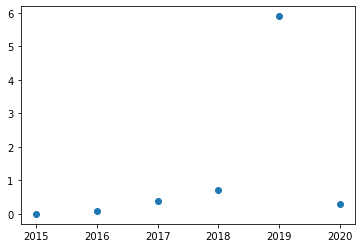

In [51]:
plt.scatter(DNA_rain_data.groupby("Year").sum().index, DNA_rain_data.groupby("Year").sum()["Rainfall (In)"])

## Overlay bacteria levels on this and plot regression

In [37]:
DNA_rain_data.groupby("Month").sum()

,Rainfall (In),Year
Month,,
5,1.1,50441
6,1.8,260227
7,3.1,276372
8,1.4,260234
9,0.0,26224


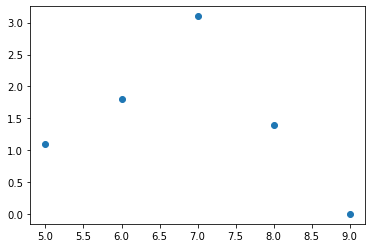

In [52]:
plt.scatter(DNA_rain_data.groupby("Month").sum().index, DNA_rain_data.groupby("Month").sum()["Rainfall (In)"])

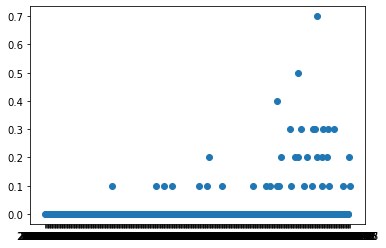

In [7]:
plt.scatter(DNA_rain_data["Date"], DNA_rain_data["Rainfall (In)"])